In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aldisk","key":"b3b2f356436652478eb9f2b760f1dfa8"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download kamilpytlak/personal-key-indicators-of-heart-disease

 33% 7.00M/21.4M [00:00<00:00, 71.4MB/s]
100% 21.4M/21.4M [00:00<00:00, 128MB/s] 


In [ ]:
!mkdir dataset
!unzip personal-key-indicators-of-heart-disease.zip -d ./dataset

Archive:  personal-key-indicators-of-heart-disease.zip
  inflating: ./dataset/2020/heart_2020_cleaned.csv  
  inflating: ./dataset/2022/heart_2022_no_nans.csv  
  inflating: ./dataset/2022/heart_2022_with_nans.csv  


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/2020/heart_2020_cleaned.csv')

# Data Analysis

In [ ]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [ ]:
df.info()
print('\n')
print(df.isnull().sum())
print('\n')
print(df.eq(0).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

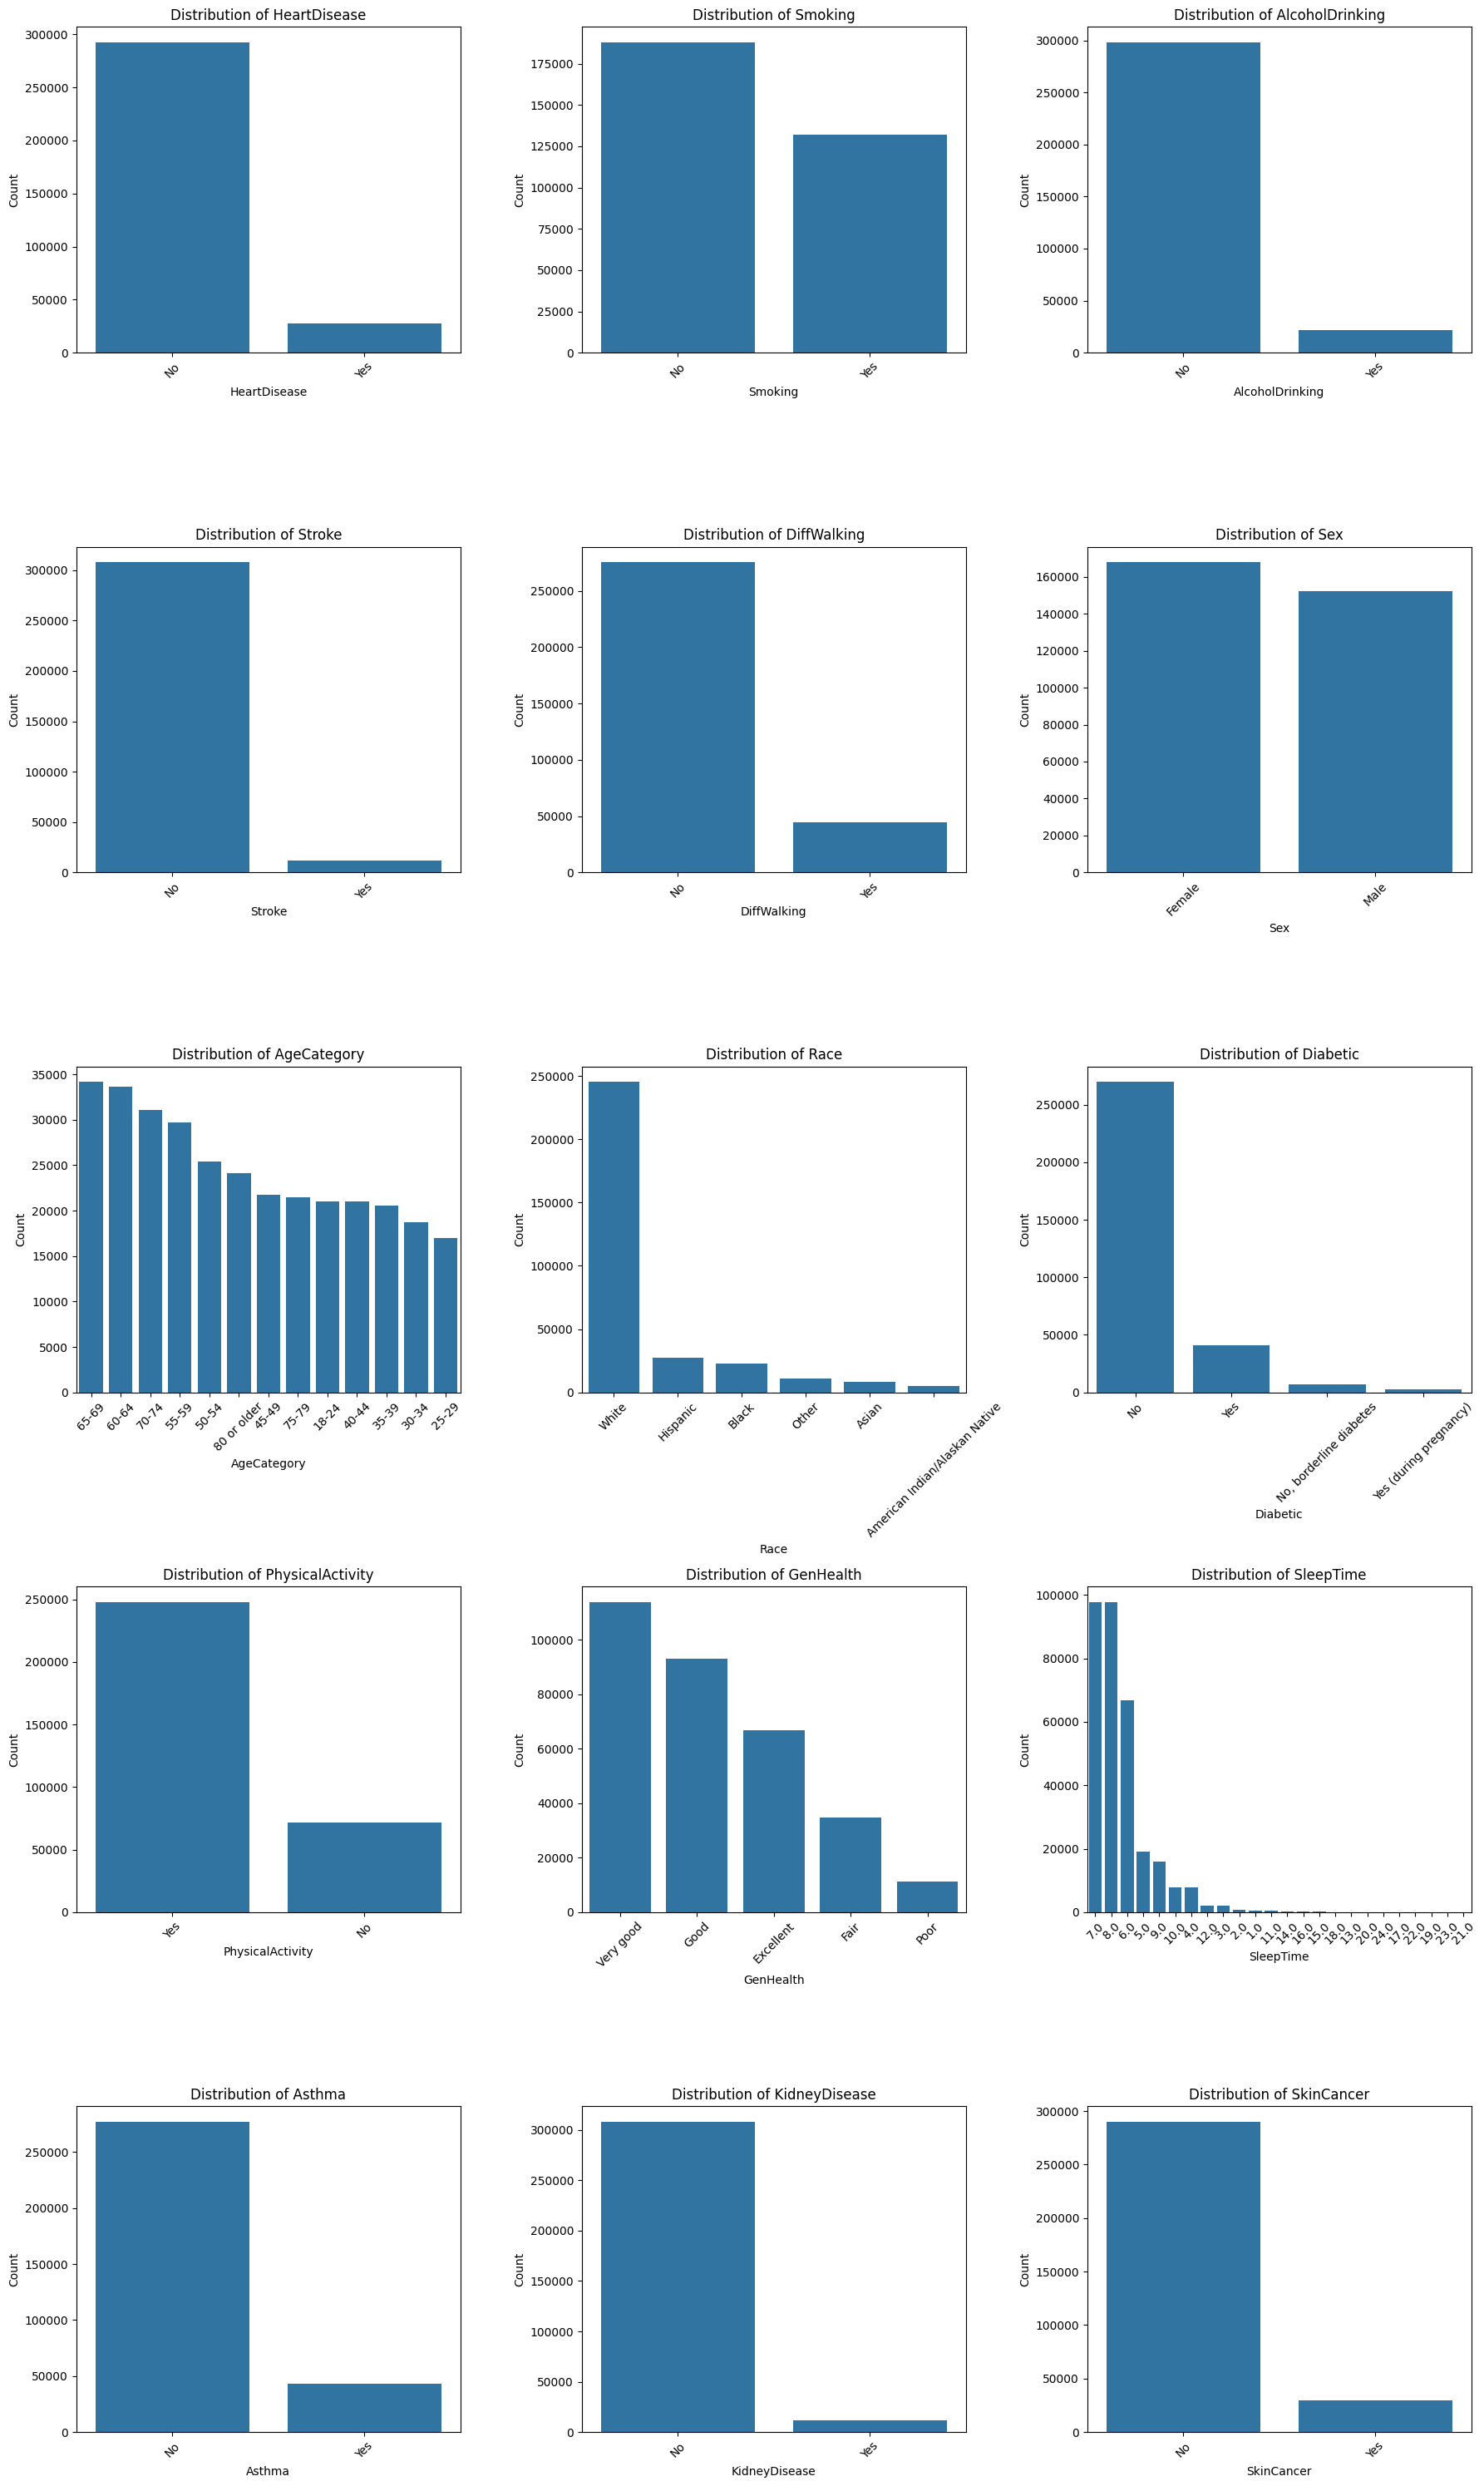

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = [col for col in df.columns if col not in ["BMI", "PhysicalHealth", "MentalHealth"]]

# Plotting
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 30))

for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df, x=col, ax=axes[i//3, i%3], order=df[col].value_counts().index)  # Specify order of x-axis labels
    axes[i//3, i%3].set_title(f'Distribution of {col}')
    axes[i//3, i%3].set_xlabel(col)
    axes[i//3, i%3].set_ylabel('Count')
    axes[i//3, i%3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

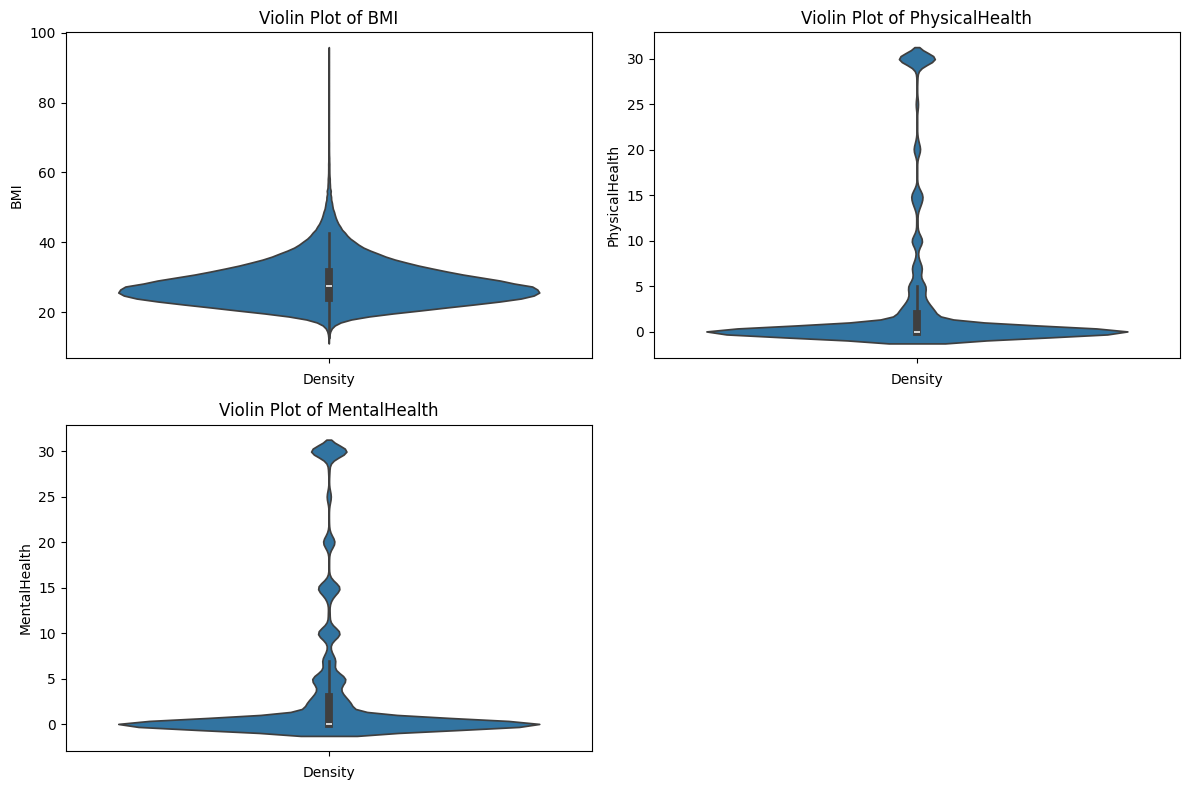

In [ ]:
columns_to_plot = ["BMI", "PhysicalHealth", "MentalHealth"]

# Plotting
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=df, y=col)
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)
    plt.xlabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
print(df['HeartDisease'].value_counts())

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


Data Kategorikal dan Ordinal umumnya memiliki distribusi yang menunjuk ke satu arah, Hal ini dapat disebabkan karena distribusi kelas target yang kurang seimbang ataupun terdapat kecenderungan lainnya yang belum diketahui

Data kontinu umumnya memiliki distribusi yang cenderung mendekati normal namun terdapat banyak cukup banyak noise

------------------------------------------

Dengan memperhatikan hal tersebut perlu dilakukan penangangan terhadap imbalanced class tersebut. Dalam kasus ini akan digunakan undersampling mengingat data class negatif sudah berjumlah cukup banyak

# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTENC

df_processed = df.copy()

# Oversampling with SMOTE
smote = SMOTENC(categorical_features = [1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16], random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_processed.drop(columns=['HeartDisease']), df_processed['HeartDisease'])

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=df.columns[1:]), pd.Series(y_resampled, name='HeartDisease')], axis=1)

print(df_resampled['HeartDisease'].value_counts())

No     292422
Yes    292422
Name: HeartDisease, dtype: int64


In [ ]:
df_resampled.isnull().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
HeartDisease        0
dtype: int64

Seluruh Data telah diproses dan di encode. Normalisasi tidak dilakukan karena akan menggunakan DecisionTree yang tidak sensitif terhadap Normalisasi

# Encoding

In [ ]:
df_encoded = df_resampled.copy()

binary = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'KidneyDisease', 'Asthma', 'SkinCancer']

for col in binary:
  df_encoded[col] = df_encoded[col].map({'No': 0, 'Yes': 1})

age_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}

diabetes_mapping = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes': 2,
    'Yes (during pregnancy)': 2,
}

health_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

race_mapping = {
    'White': 1,
    'Hispanic': 2,
    'Black': 3,
    'Asian': 4,
    'American Indian/Alaskan Native': 5,
    'Other': 6
}

df_encoded['Sex'] = df_encoded['Sex'].map({'Female': 0, 'Male': 1})
df_encoded['AgeCategory'] = df_encoded['AgeCategory'].map(age_mapping)
df_encoded['Diabetic'] = df_encoded['Diabetic'].map(diabetes_mapping)
df_encoded['GenHealth'] = df_encoded['GenHealth'].map(health_mapping)
df_encoded['Race'] = df_encoded['Race'].map(race_mapping)

In [ ]:
df_encoded.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,3.0,30.0,0,0,8,1,2,1,4,5.0,1,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,13,1,0,1,4,7.0,0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,10,1,2,1,2,8.0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,12,1,0,0,3,6.0,0,0,1,0
4,23.71,0,0,0,28.0,0.0,1,0,5,1,0,1,4,8.0,0,0,0,0
5,28.87,1,0,0,6.0,0.0,1,0,12,3,0,0,2,12.0,0,0,0,1
6,21.63,0,0,0,15.0,0.0,0,0,11,1,0,1,2,4.0,1,0,1,0
7,31.64,1,0,0,5.0,0.0,1,0,13,1,2,0,3,9.0,1,0,0,0
8,26.45,0,0,0,0.0,0.0,0,0,13,1,1,0,2,5.0,0,1,0,0
9,40.69,0,0,0,0.0,0.0,1,1,10,1,0,1,3,10.0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data into features (X) and target variable (y)
X = df_encoded.drop(columns=['HeartDisease'])
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.isnull().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
584839    1
584840    1
584841    1
584842    1
584843    1
Name: HeartDisease, Length: 584844, dtype: int64

# Modelling (Decision Tree)

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', min_samples_split=6, max_features='log2')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=6)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     58689
           1       0.89      0.88      0.88     58280

    accuracy                           0.88    116969
   macro avg       0.88      0.88      0.88    116969
weighted avg       0.88      0.88      0.88    116969

Accuracy Score: 0.8821140644102283


# Modelling (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForestClassifier with optional hyperparameters
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators=50, min_samples_split=2)

# Fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [ ]:
# Predict the target variable for the test data
y_pred_rfc = rfc.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rfc))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     58689
           1       0.92      0.93      0.92     58280

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969

Accuracy Score: 0.9235780420453282


Dari hasil ujicoba diatas didapatkan bahwa algoritma Random Forest lebih baik dalam memperkirakan resiko seseorang terkena penyakit jantung. Akurasi dari kedua algoritma belum cukup baik untuk dijadikan sebagai sistem deteksi utama penyakit, meskipun demikian, kedua algoritma dapat digunakan sebagai sistem pembantu untuk menseleksi orang dengan resiko penyakit jantung secara cepat. Selain itu dikarenakan tingkat explainability dari Decision Tree dan Random Forest tinggi dibandingkan metode ML lainnya, knowledge yang didapatkan dari kedua metode diatas dapat diaplikasikan secara langsung untuk pengembangan metode deteksi penyakit jantung lainnya dengan basis statistika ataupun untuk memahami alur kerja algoritma untuk meningkatkan kepercayaan terhadap model yang telah dibuat